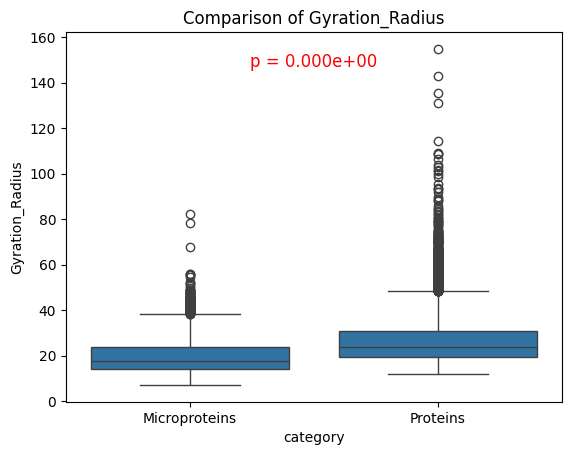

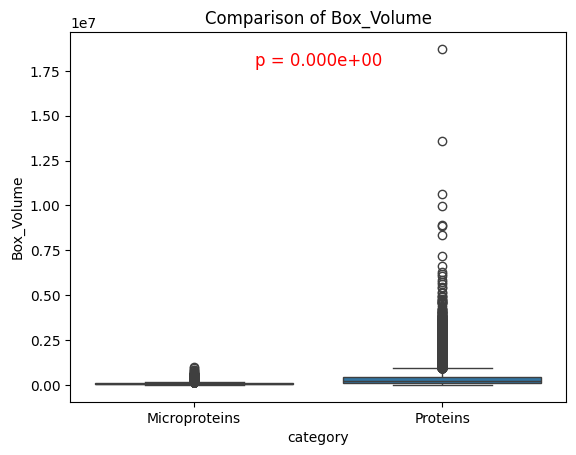

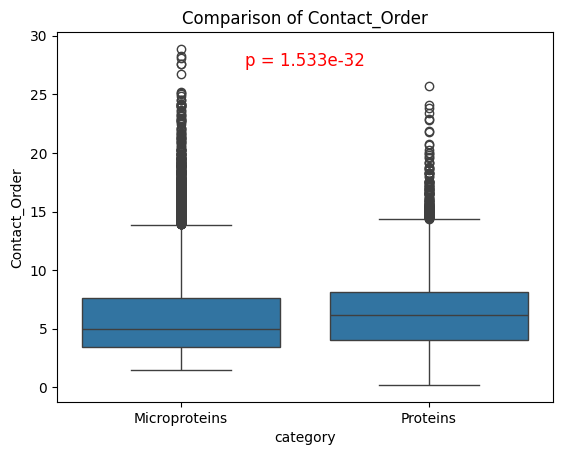

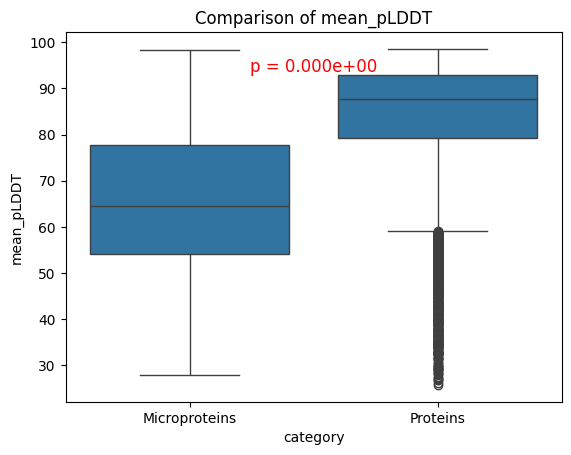

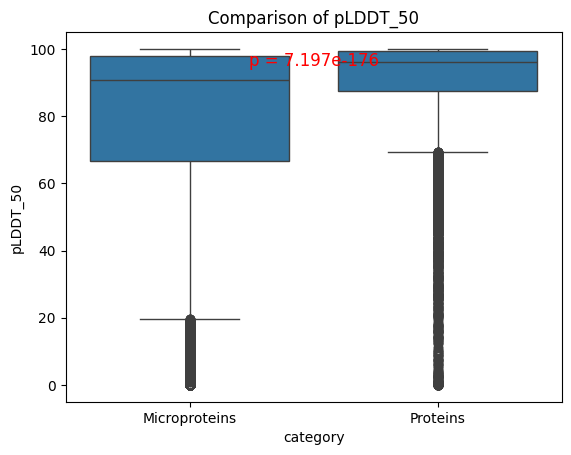

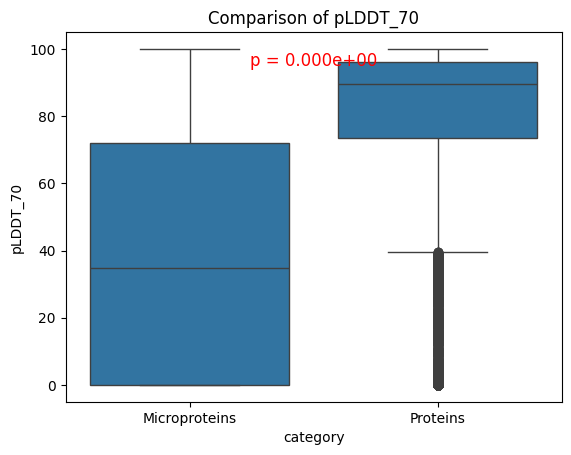

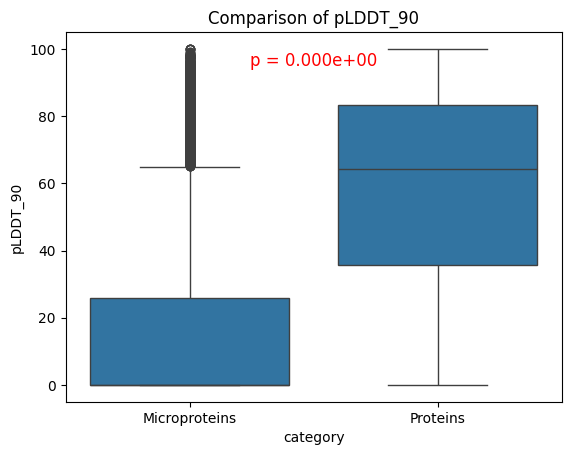

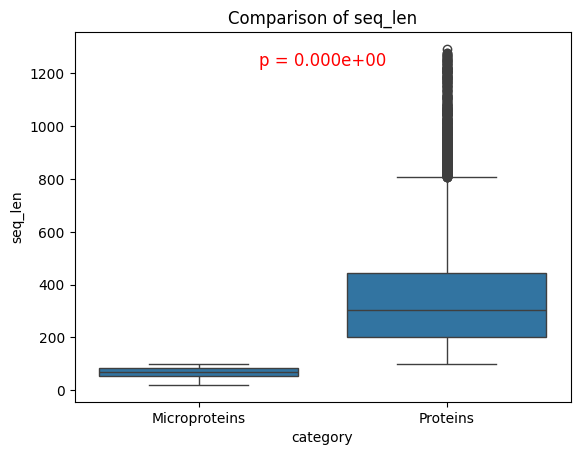

In [42]:
import polars as pl 
import matplotlib.pyplot as plt 
import seaborn as sns 




microproteins = pl.scan_csv("/Users/simonherman/Documents/Gits/MicroStruct/Uniprot_20_100_structural_descriptors.csv", separator = ";").with_columns(
    category = pl.lit("Microproteins")
).with_columns(

    pLDDT_50 = pl.col("pLDDT_50") * 100, 
    pLDDT_70 = pl.col("pLDDT_70") * 100, 
    pLDDT_90 = pl.col("pLDDT_90") * 100
    
)

proteins = pl.scan_csv("/Users/simonherman/Documents/Gits/MicroStruct/Uniprot_over_100_structural_descriptors.csv", separator = ";").with_columns(
    category = pl.lit("Proteins")
)

lf = pl.concat([microproteins, proteins]).filter(
    pl.int_range(pl.len()).shuffle().over("category") < 10000
)


import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import polars as pl  # Assuming you're using polars

for column in lf.collect_schema().names():
    if column in ["ID", "category"]:
        continue

    data = lf.select([column, "category"]).collect().to_pandas()

    data["category"] = data["category"].astype(str)  

    categories = data["category"].unique()
    if len(categories) != 2:
        continue 

    group1 = data[data["category"] == categories[0]][column]
    group2 = data[data["category"] == categories[1]][column]

    stat, p_value = stats.mannwhitneyu(group1, group2, alternative="two-sided")

    plt.figure()
    ax = sns.boxplot(data=data, x="category", y=column)

    # Annotate p-value
    plt.text(
        x=0.5, y=max(data[column]) * 0.95, 
        s=f"p = {p_value:.3e}", 
        ha='center', fontsize=12, color='red'
    )

    plt.title(f"Comparison of {column}")
    plt.show()




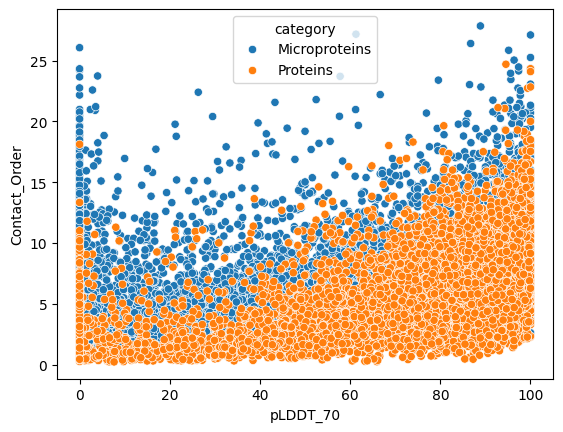

In [43]:
plt.figure()
sns.scatterplot(data = lf.collect(), x = "pLDDT_70", y ="Contact_Order", hue = "category")
plt.show()